## Assignment 1
***
Please adhere exactly to the [Code of Conduct](https://datascience.ai.wu.ac.at/ws21/dataprocessing1/code_of_conduct.html) for every assignment. 

Do NOT use any libraries for your solutions of the tasks, the usage of python built-in functions is allowed.

Do NOT change the structure of the notebook (e.g. add/remove cells).

Remove the raise of any `NotImplementedError` in your code before submission.

In [1]:
# Please indicate your student id as a string, w/o the leading 'h'!
student_id = "11915039"

### Task 1
***
Implement a function `topBigrams` which returns the 10 most frequent character pairs of adjacent letters in an English text. The function must return a `list` holding the 10 most frequently occurring character pairs in descending order. This function can be used, for example, to optimise the key assignment on a keyboard.

Important:
* You are meant to work on a particular input text available from the supplemental script `corpus.py`.
* `corpus.py`, when loaded, will provide a corpus of 20 candidate texts.
* Work on the text in this corpus identified by a computed position. Your position is computed as the integer obtained from your `student_id` (trim any leading zeroes!) modulo `20` (there are 20 candidate texts in `corpus`, hence this divisor).

Hints:
* The modulo is also known as the residual computation, e.g.: `50 % 10 = 5` (see also Task 2).
* In a first step, remove any character other than [A-Z, a-z] from the input string for bigram frequency analysis. 
* When calculating the occurences of character pairs, uppercase letters should be treated the same as lowercase letters.

The corpus.py file shall be omitted in the submitted zip-file.


In [2]:
# Load the list of English texts into a variable called 'corpus'
%run corpus.py

In [3]:
def topBigrams(text):
    # YOUR CODE HERE
    alpha = list([character for character in text.lower()
               if character.isalpha()])
  
    result = "".join(alpha)
    
    bigrams = {}
    
    for i in range(0, len(result)-1):
            key = result[i] + result[i+1]
            
            if key in bigrams.keys():
                bigrams[key] = bigrams[key] + 1
            else:
                bigrams[key] = 1
    
    mostBigrams = []
    
    n = 0
    while n < 10:
        keyMax = max(bigrams, key=bigrams.get)
        mostBigrams.append(keyMax)
        del bigrams[keyMax]
        n = n + 1

    return mostBigrams

In [4]:
from nose.tools import assert_equal
text = corpus[(int(student_id.lstrip("h0")) % len(corpus))][0]
assert_equal(type(topBigrams(text)), list)
assert_equal(len(topBigrams(text)), 10)
assert_equal(topBigrams("NotImplementedError"), ['no', 'ot', 'ti', 'im', 'mp', 'pl', 'le', 'em', 'me', 'en'])
assert_equal(topBigrams("Yes, I will adhere to the Code of Conduct"), ['he', 'co', 'ye', 'es', 'si', 'iw', 'wi', 'il', 'll', 'la'])

### Task 2
***
The following program printout was created using the Blockly visual programming environment. It computes the reverse of a provided integer number `n`. It was also featured in the entry exam. Implement a Python program (function) corresponding to the Blockly one.

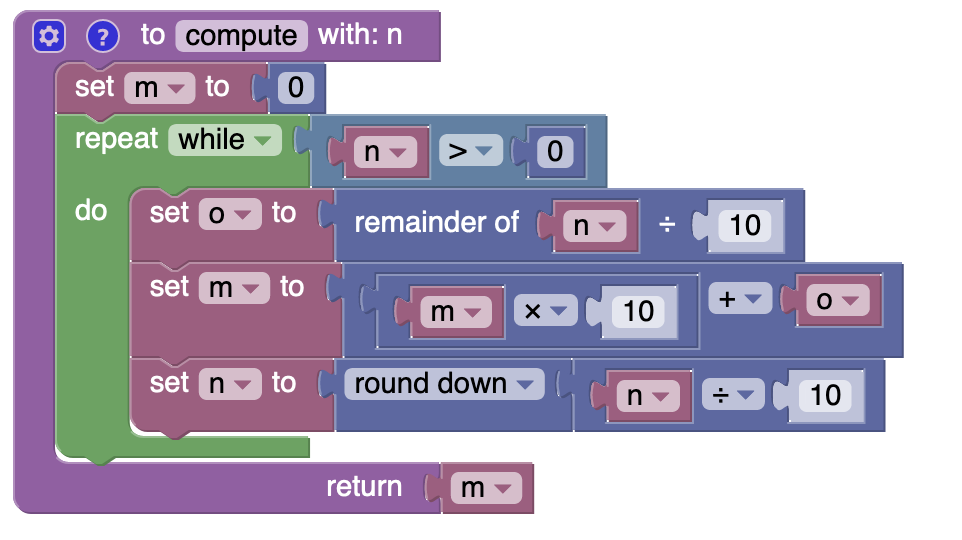

* Mind the importance of precedence of nested terms in Blocky arithmetic expressions.
* You need to handle attempts of providing a non-integer value.

In [5]:
def compute(n):
    # YOUR CODE HERE
    if isinstance(n, int) == False:
        return "Wrong input type"
    
    m = 0
        
    while n > 0:
        o = n % 10
        m = (m * 10) + o
        n = int(n / 10)
        
    return m


In [6]:
from nose.tools import assert_equal
assert_equal(compute(-158), 0)
assert_equal(compute(158), 851)
assert_equal(type(compute(100)), int)
assert_equal(compute(4231), 1324)
assert_equal(compute("整数"), "Wrong input type")

### Task 3
***
You must provide means to reverse a particular, previously performed encoding: You need to decode an encoded string into its original, unencoded form.

For this task, the previously performed encoding (not shown in this notebook) is known to operate as follows:

* Each input string's characters (and blank spaces) are split left to right across an arbitrary number of columns according to an input integer, which we will call `key` again.
* Intermediate blanks (whitespaces) separating two words are filled using dashes (`-`).
* Dashes (`-`) are also used for padding the string under encoding to match the fixed number of columns.
* Subsequently, each column's characters (over the rows) now represent the encoded "words" of the output string, for example:

| 1st | 2nd | 3rd | 4th | 5th |
|-----|-----|-----|-----|-----|
|  H  |  E  |  L  |  L  |  O  |
|  -  |  I  |  -  |  L  |  O  |
|  V  |  E  |  -  |  E  |  N  |
|  C  |  O  |  D  |  I  |  N  |
|  G  |  S  |  -  |  -  |  -  |

would return the encoded string **`H-VCG EIEOS L--D- LLEI- OONN-`**.

Your job now is to reverse this transformation by creating a program that **automatically decodes strings resulting from the above transformation** and that returns the string.

_Hint: Pay attention to trailing dashes. When decoding, they are dropped and do not turn into blanks (whitespaces)!_


In [7]:
def decode(input_string):
    
    # YOUR CODE HERE
    if isinstance(input_string, str) == False:
        return "Wrong input type"
    
    columns = input_string.split(" ")  
    string = ""
    i = 0
    
    while i < len(columns[0]):
        j = 0
        while j < len(columns):
            string = string + columns[j][i]
            j = j + 1
        i = i + 1
    
    return string.replace("-", " ").strip()

In [8]:
from nose.tools import assert_equal
assert_equal(decode("H-VCG EIEOS L--D- LLEI- OONN-"), 'HELLO I LOVE ENCODINGS')
assert_equal(decode("T-A-I HA-SN ELHE- RWICD EADRA -YDET ISETA S-N--"), 'THERE IS ALWAYS A HIDDEN SECRET IN DATA')
assert_equal(decode("NHRHA OA-IG BLRSE OLE-- D-AM- YEDE- -V-S- SETS-"), 'NOBODY SHALL EVER READ THIS MESSAGE')
assert_equal(type(decode("ts et")), str)
assert_equal(len(decode("T- HS IE SN -T WE IN LC LE -- BI E- -G AU -E LS OS N- G-")), 36)
assert_equal(decode(""), "")
assert_equal(decode([]), "Wrong input type")

### Task 4
***
Implement a function `cleaning`, which takes as an input a string and returns partitions of an input string (`words`), which are seperated by certain characters, as a list of words. 
* Your function must recognize the following characters as separators: `'-'` , `'_'`, `'+'` , `'^'`, `','`, `'#'`, `'.'`, `';'`, `'!'`, `'?'`, `':'`, `'>'`, `'<'` and `' '`. The resulting list should not contain elements that are separators.
Additionally, your function should implement the following things:
* Numbers in the input string should be effectively removed from the output, also in the case that they are appended to a word (e.g. `'hell7o'`).
* Furthermore, the resulting list (i.e. the output) should not hold any of the words that can be found in the `stopwords` list.

In [9]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 
             'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 
             'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
             'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 
             'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 
             'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 
             'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 
             'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 
             'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 
             'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 
             'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', 
             "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 
             'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [10]:
 def cleaning(input_string, stopword_list):
    
    # YOUR CODE HERE
    if isinstance(input_string, str) == False:
        return "Wrong input type"
    
    alpha = list([character for character in input_string
               if character.isnumeric() == False])
  
    text = "".join(alpha)
    
    seperators = ['-' , '_', '+' , '^', ',', '#', '.', ';', '!', '?', ':', '>', '<', ' ']
    
    for s in seperators:
        text = text.replace(s, " ")
    
    text = list(filter(None, text.split(" ")))
    
    for stopW in stopword_list:
        if stopW in text:
            text.remove(stopW)
    
    return text

In [11]:
from nose.tools import assert_equal
assert_equal(cleaning("Goo7d.day you won<her.sir!", stopwords), ['Good', 'day', 'sir'])
assert_equal(cleaning("Plea8se.h3elp me<to.aren't?clean, my1+very<me69ssy8-strin1234gs 28_!19287", stopwords), ['Please', 'help', 'clean', 'messy', 'strings'])
assert_equal(cleaning("Plea8se.h3elp me<to.aren't?clean, my1+very<me69ssy8-strin1234gs 28_!19287", []), ['Please', 'help', 'me', 'to', "aren't", 'clean', 'my', 'very', 'messy', 'strings'])
assert_equal(cleaning("Tr7y this;,<+ 2o3n5e", stopwords), ['Try', 'one'])
assert_equal(cleaning("Tr7y this;,<+ 2o3n5e", []), ['Try', 'this', 'one'])
assert_equal(len(cleaning("The_ch3air,w2as+so-ha76ppy<>f7o2356r,al9ice!", stopwords)), 4)
assert_equal(type(cleaning("Goo7d.day you won<her.sir", stopwords)), list)
assert_equal(cleaning([], stopwords), "Wrong input type")
assert_equal(cleaning(24, stopwords), "Wrong input type")
assert_equal(cleaning("", stopwords), [])

### Task 5

Implement a function `as_netstring` which is capable of turning an arbitrary Python list, holding elements of mixed type, first into a sentence (elements are separated by a single space, closed by a dot) and, second, the intermediate phrase into a so-called [netstring](https://cr.yp.to/proto/netstrings.txt). A netstring encodes details of a string (i.e., its length) along with the string in a predefined manner:
```
<length>":"<string>","
```
For example, an empty string is represented as the following netstring: `0:,`.

Netstrings are used as a building block for robust transmission and representation of string data.


In [12]:
def as_netstring(x):
    # YOUR CODE HERE
    netstring = ""
    for item in x:       
        if x.index(item) == (len(x)-1):
            netstring += str(item) + "."
        else:
            netstring += str(item) + " "
    
    return str(len(netstring)) + ":" + netstring + ","

In [13]:
from nose.tools import assert_equal
assert_equal('28:This LV has the number 1855.,', as_netstring(['This', 'LV', 'has', 'the', 'number', 1855]))
assert_equal('5:This.,', as_netstring(['This']))
assert_equal('0:,', as_netstring([]))